# Rain Weather Forecasting prediction

### problem statement
##### Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

<b>Importing require library for performing EDA, Data Wrangling and data cleaning<b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Temperature Forecast dataset Csv
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [6]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4186,2017-03-15,Williamtown,19.9,25.9,13.2,NaN,NaN,ENE,52.0,ENE,ENE,9.0,30.0,89.0,70.0,1019.2,1017.1,1.0,8.0,22.3,25.3,Yes,Yes


In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


# Statistical Analysis
<b>Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.<b>

In [13]:
df.duplicated().sum()

1663

<b>check if any whitespace, 'NA' or '-' exist in dataset.<b>

In [14]:
df.isin([' ','NA','-']).sum().any()

False

# Missing value check

In [15]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [16]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

In [17]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 8425 Rows and 23 Columns before dropping null values.
We have 3790 Rows and 23 Columns after dropping null values.


In [18]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,ESE,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,S,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009


In [19]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201,15.798681,6.446438,2011.270449
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694,8.832828,3.436589,1.607894
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000,1.000000,1.000000,2009.000000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000,8.000000,3.000000,2010.000000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000,16.000000,6.000000,2011.000000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000,23.000000,9.000000,2012.000000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,31.000000,12.000000,2016.000000


# Start Exploring Present Temperature

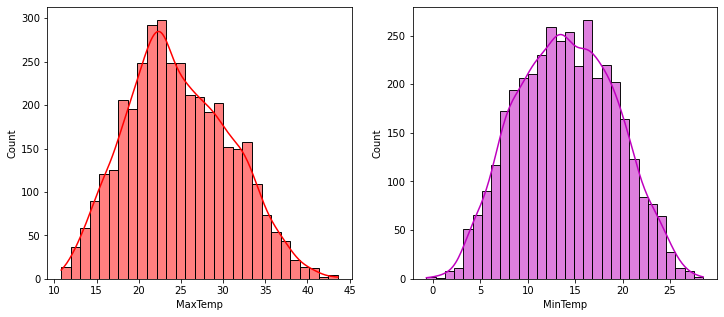

In [20]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['MaxTemp'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['MinTemp'],kde=True,color='m')
plt.show()

# REMOVAL OF NULL USING IMPUTER

In [21]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [22]:
l=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [23]:
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [24]:
imp2=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [25]:
lint=['MinTemp','MaxTemp',  
 'Rainfall',     
 'Evaporation',    
 'Sunshine',   
 'WindGustSpeed',  
 'WindSpeed9am',  
 'WindSpeed3pm', 
 'Humidity9am',  
 'Humidity3pm',  
 'Pressure9am',   
 'Pressure3pm',   
 'Cloud9am', 
 'Cloud3pm',      
 'Temp9am' ,    
 'Temp3pm']

In [26]:
for i in lint:
    df[i]=imp2.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

# EDA

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CoffsHarbour'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'Melbourne'),
  Text(3, 0, 'Brisbane'),
  Text(4, 0, 'PerthAirport'),
  Text(5, 0, 'Darwin')])

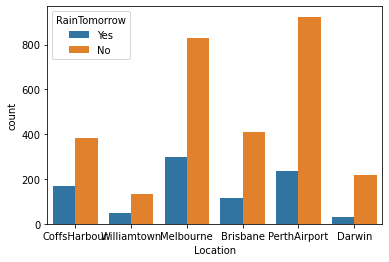

In [30]:
sns.countplot(df['Location'],hue=df['RainTomorrow'])
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'SW'),
  Text(1, 0, 'WSW'),
  Text(2, 0, 'NNW'),
  Text(3, 0, 'WNW'),
  Text(4, 0, 'W'),
  Text(5, 0, 'E'),
  Text(6, 0, 'NW'),
  Text(7, 0, 'NNE'),
  Text(8, 0, 'N'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'S'),
  Text(11, 0, 'ESE'),
  Text(12, 0, 'SSE'),
  Text(13, 0, 'NE'),
  Text(14, 0, 'SE'),
  Text(15, 0, 'ENE')])

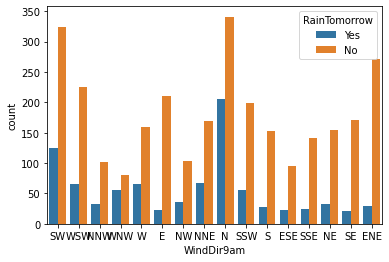

In [31]:
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'])
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ESE'),
  Text(1, 0, 'S'),
  Text(2, 0, 'ENE'),
  Text(3, 0, 'NE'),
  Text(4, 0, 'NNE'),
  Text(5, 0, 'NNW'),
  Text(6, 0, 'SE'),
  Text(7, 0, 'SSE'),
  Text(8, 0, 'SSW'),
  Text(9, 0, 'WSW'),
  Text(10, 0, 'N'),
  Text(11, 0, 'NW'),
  Text(12, 0, 'E'),
  Text(13, 0, 'W'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'SW')])

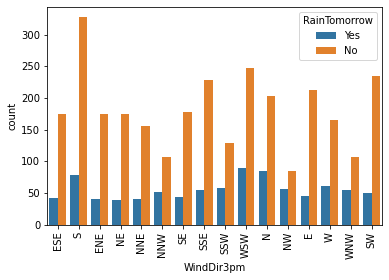

In [32]:
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ESE'),
  Text(1, 0, 'E'),
  Text(2, 0, 'WSW'),
  Text(3, 0, 'ENE'),
  Text(4, 0, 'NNE'),
  Text(5, 0, 'NNW'),
  Text(6, 0, 'S'),
  Text(7, 0, 'SW'),
  Text(8, 0, 'SSE'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'SE'),
  Text(11, 0, 'NE'),
  Text(12, 0, 'N'),
  Text(13, 0, 'NW'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'W')])

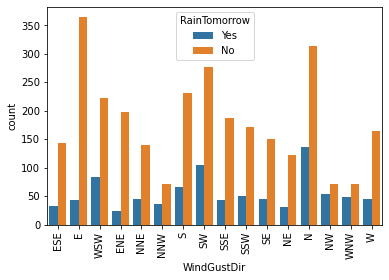

In [33]:
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

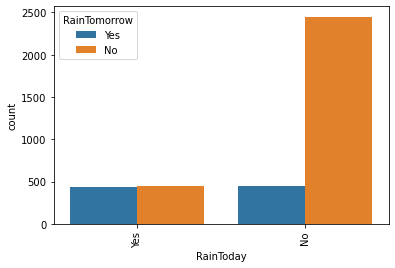

In [34]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

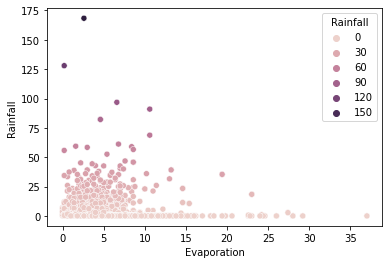

In [35]:
sns.scatterplot(x='Evaporation', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

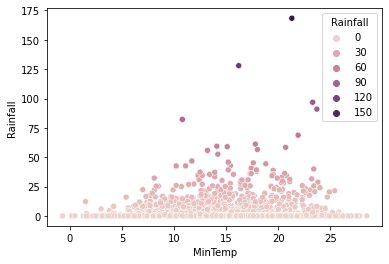

In [36]:
sns.scatterplot(x='MinTemp', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

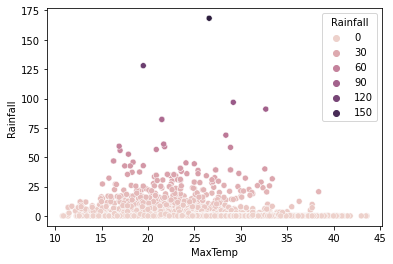

In [37]:
sns.scatterplot(x='MaxTemp', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

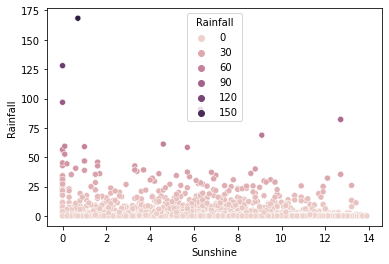

In [38]:
sns.scatterplot(x='Sunshine', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

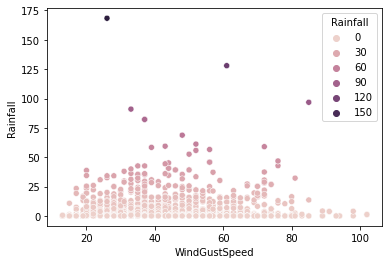

In [39]:
sns.scatterplot(x='WindGustSpeed', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

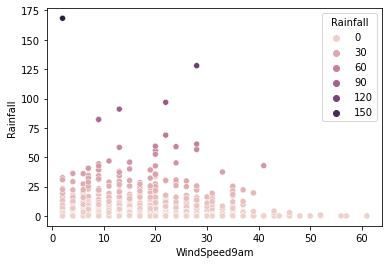

In [40]:
sns.scatterplot(x='WindSpeed9am', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

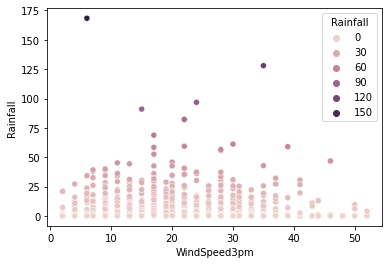

In [41]:
sns.scatterplot(x='WindSpeed3pm', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

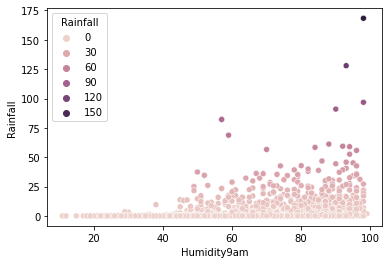

In [42]:
sns.scatterplot(x='Humidity9am', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

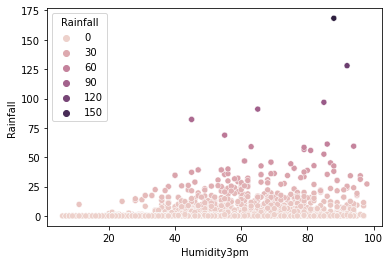

In [43]:
sns.scatterplot(x='Humidity3pm', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

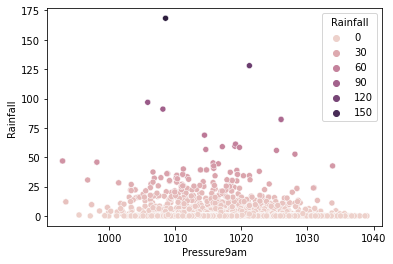

In [44]:
sns.scatterplot(x='Pressure9am', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

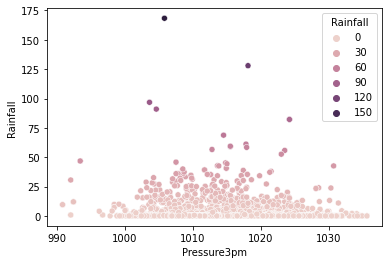

In [45]:
sns.scatterplot(x='Pressure3pm', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

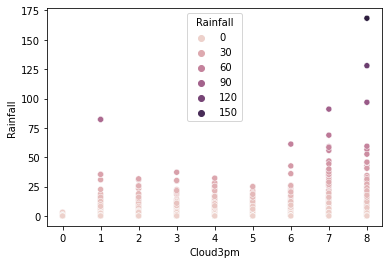

In [46]:
sns.scatterplot(x='Cloud3pm', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

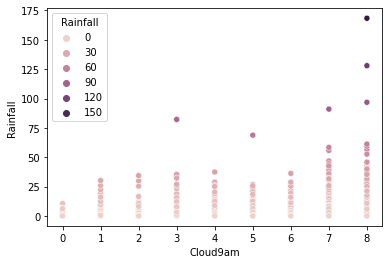

In [47]:
sns.scatterplot(x='Cloud9am', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

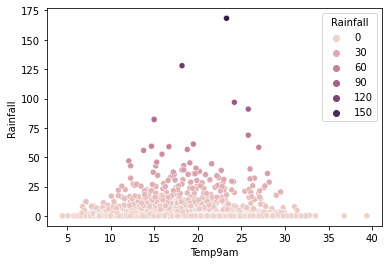

In [48]:
sns.scatterplot(x='Temp9am', y='Rainfall', hue='Rainfall', data=df)

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

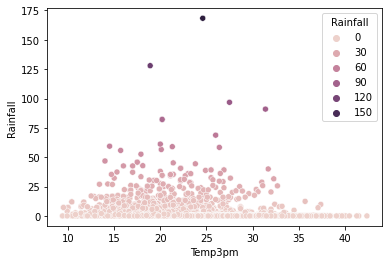

In [49]:
sns.scatterplot(x='Temp3pm', y='Rainfall', hue='Rainfall', data=df)

# Label Encoder

In [50]:
l=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
l2=['Date','Location']

In [53]:
for i in l:
    df[i]=le.fit_transform(df[i])

In [54]:
for i in l2:
    df[i]=le.fit_transform(df[i])

In [55]:
df.dtypes

Date               int64
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Day                int64
Month              int64
Year               int64
dtype: object

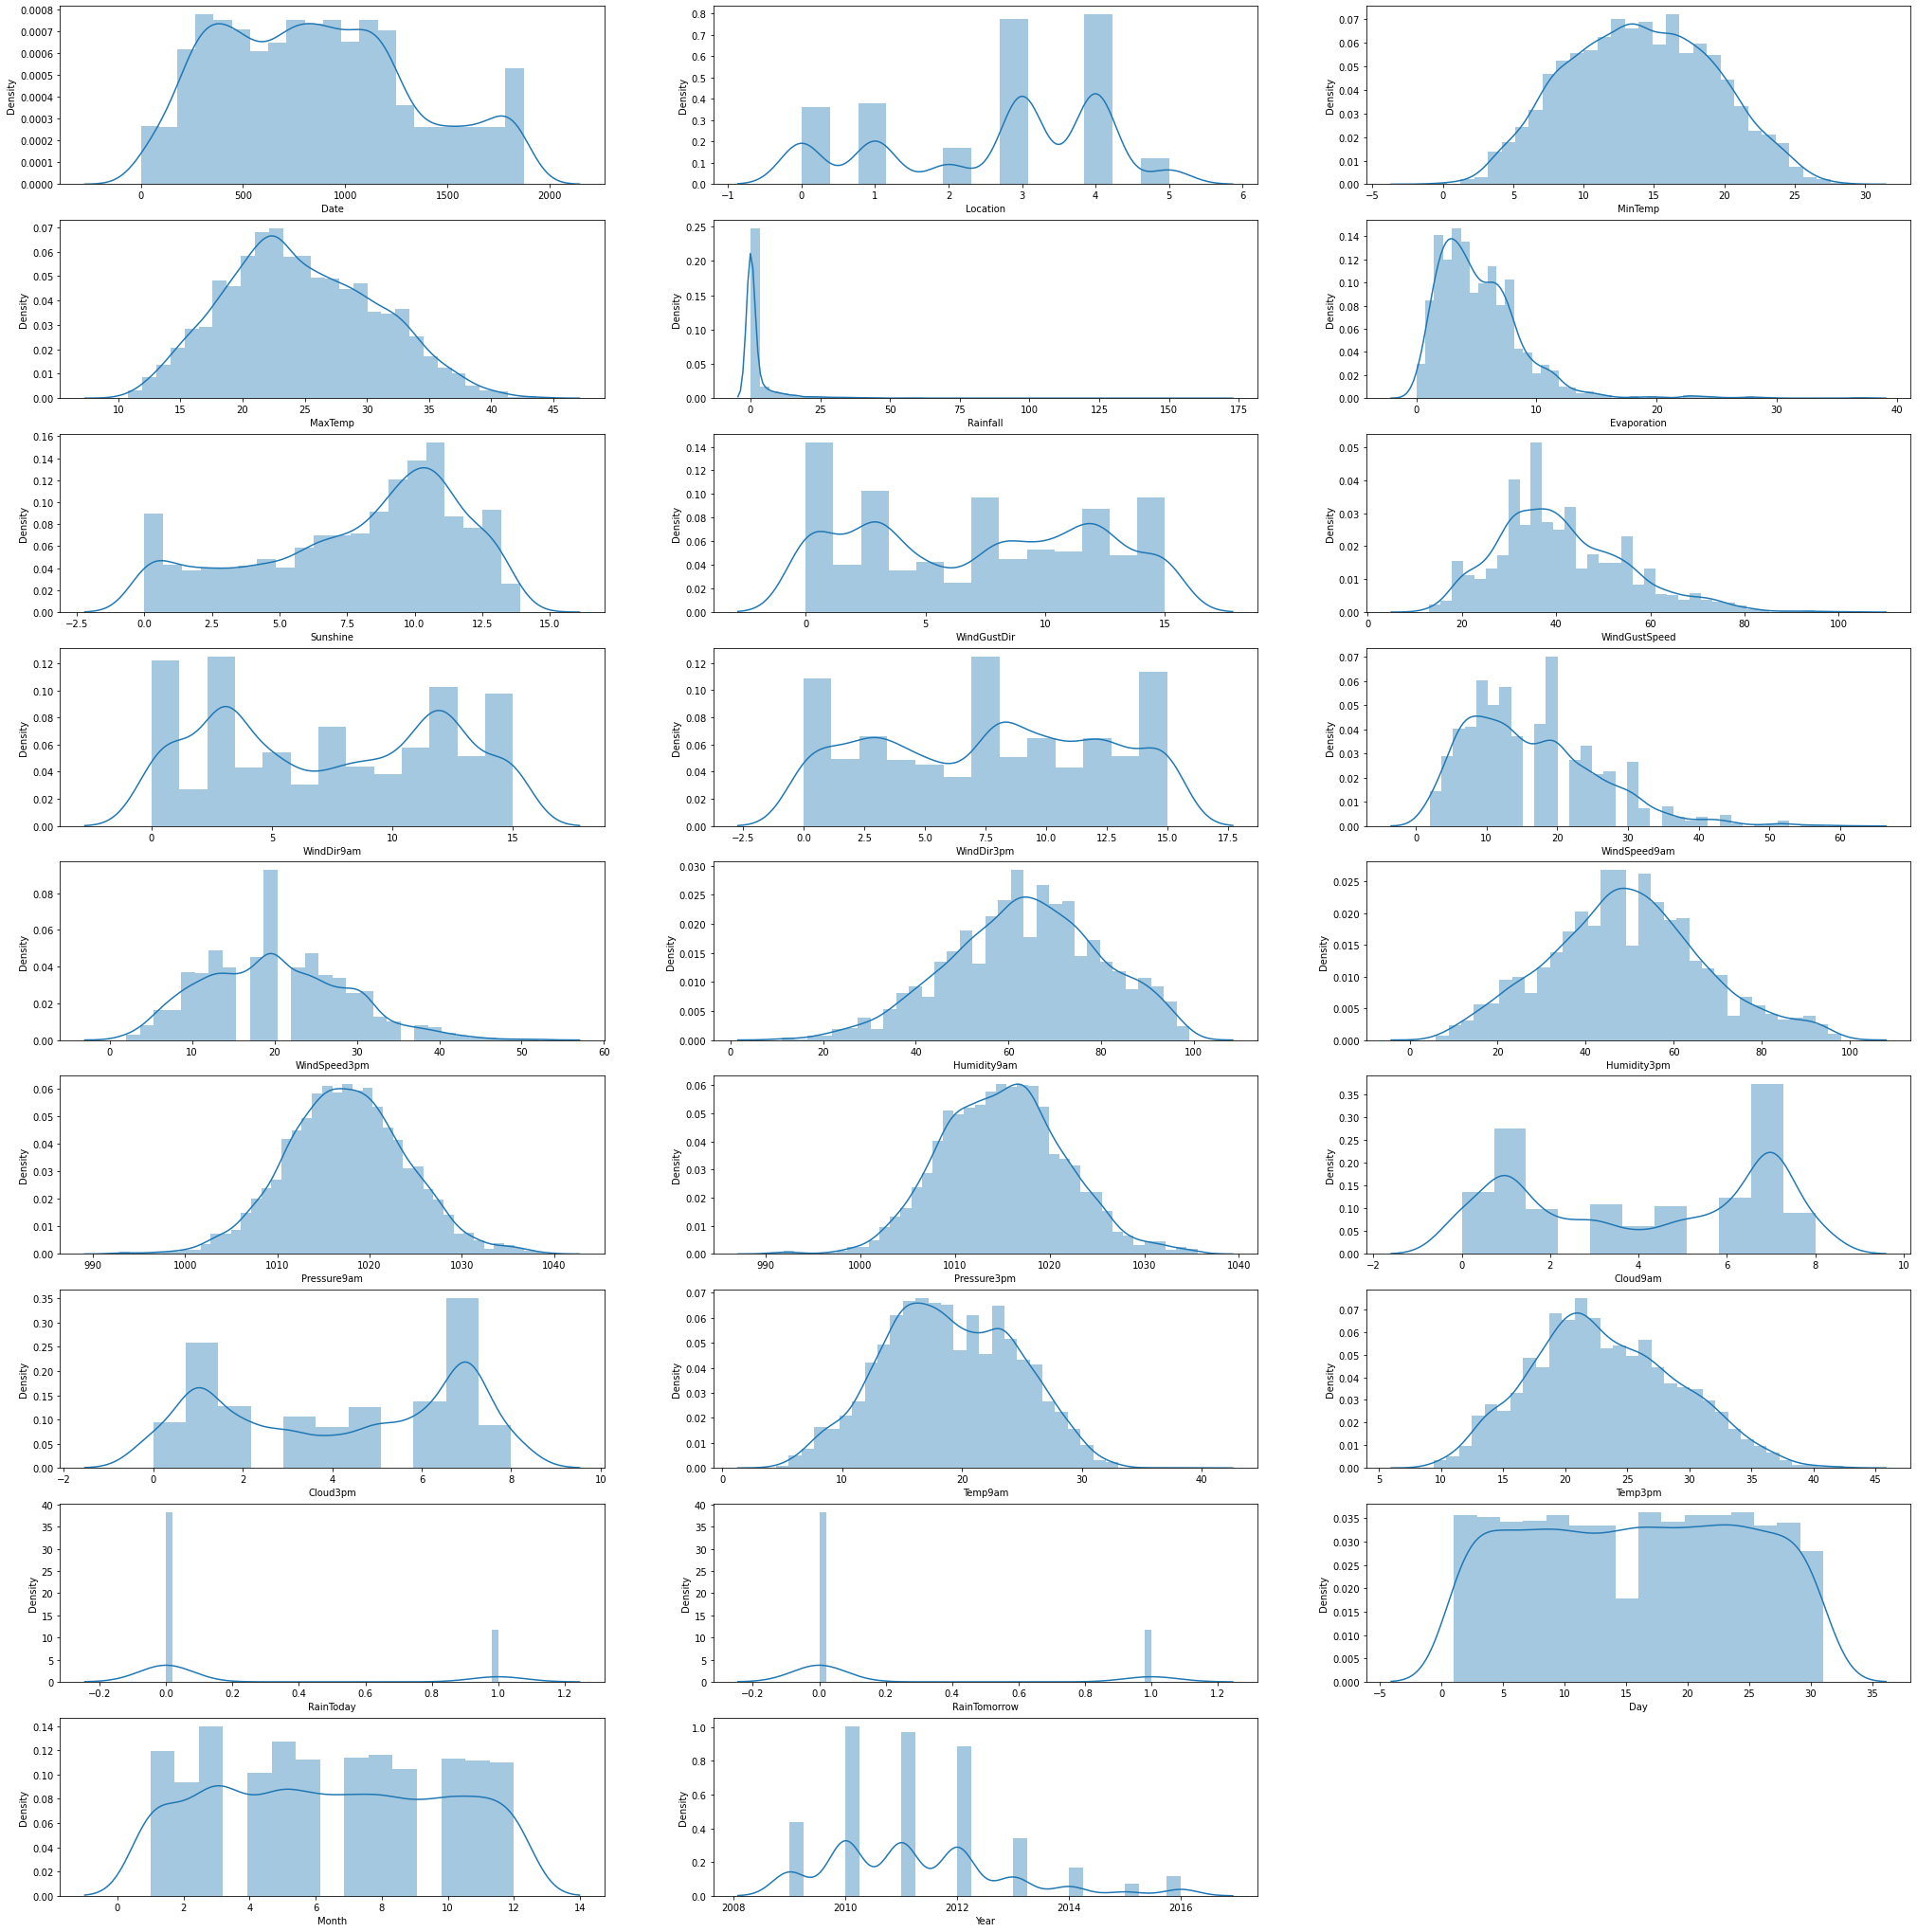

In [56]:
plt.figure(figsize=(35,45))
count =1
for column in df:
    if count <= 31:
        ax = plt.subplot(11,3,count)
        sns.distplot(df[column])
        plt.xlabel(column) 
    count+=1
plt.show()

# descriptive statistics

In [57]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,857.661214,2.629024,14.071029,24.733483,2.451768,5.292533,7.852744,7.245910,41.203958,7.415040,7.663325,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201,0.234565,0.234565,15.798681,6.446438,2011.270449
std,474.243606,1.500454,5.161176,6.068364,7.772025,3.642341,3.816696,4.894959,13.857829,4.796248,4.682656,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694,0.423782,0.423782,8.832828,3.436589,1.607894
min,0.000000,0.000000,-0.700000,10.800000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000,0.000000,0.000000,1.000000,1.000000,2009.000000
25%,461.000000,1.000000,10.200000,20.300000,0.000000,2.800000,5.200000,3.000000,31.000000,3.000000,3.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,827.000000,3.000000,14.000000,24.100000,0.000000,4.600000,8.900000,8.000000,39.000000,7.000000,8.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000,0.000000,0.000000,16.000000,6.000000,2011.000000
75%,1172.000000,4.000000,17.900000,29.200000,0.800000,7.000000,10.800000,12.000000,50.000000,12.000000,12.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000,0.000000,0.000000,23.000000,9.000000,2012.000000
max,1872.000000,5.000000,28.500000,43.600000,168.400000,37.000000,13.900000,15.000000,102.000000,15.000000,15.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,1.000000,1.000000,31.000000,12.000000,2016.000000


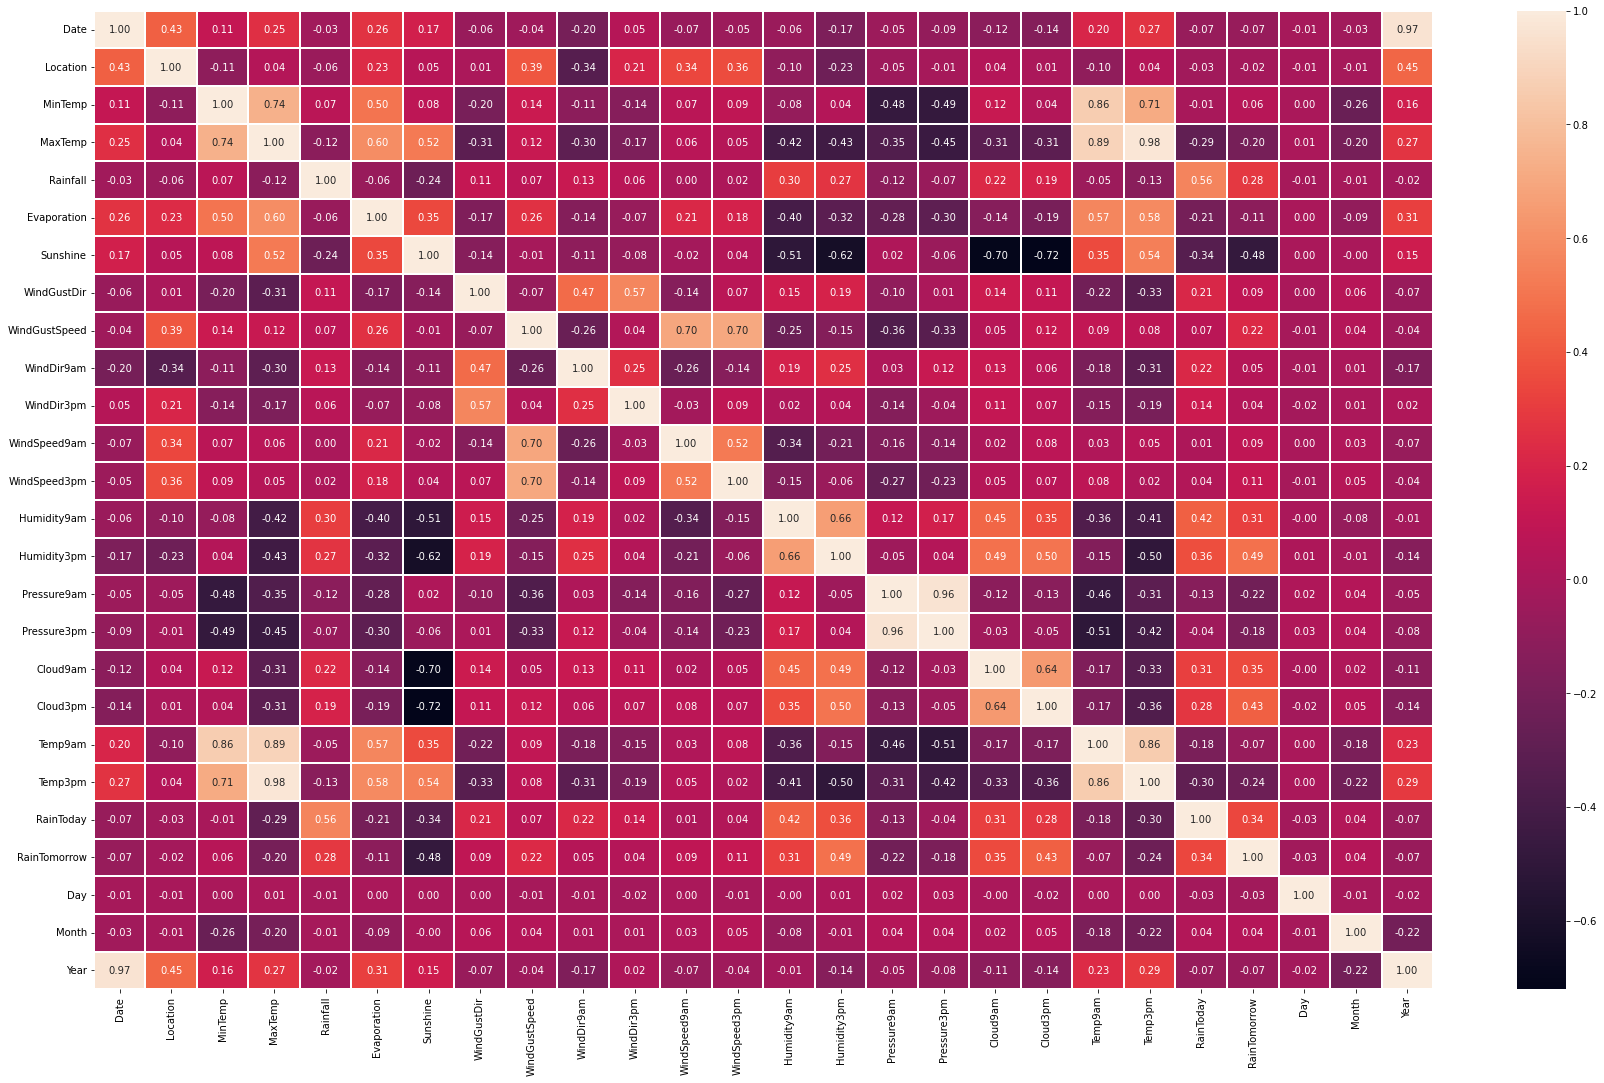

In [58]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [59]:
df.corr()["Rainfall"].sort_values()

Sunshine        -0.237101
Temp3pm         -0.126175
MaxTemp         -0.120673
Pressure9am     -0.120569
Pressure3pm     -0.067936
Evaporation     -0.064387
Location        -0.057983
Temp9am         -0.050368
Date            -0.030191
Year            -0.023651
Day             -0.014764
Month           -0.008826
WindSpeed9am     0.001508
WindSpeed3pm     0.016936
WindDir3pm       0.064068
MinTemp          0.071315
WindGustSpeed    0.073402
WindGustDir      0.108397
WindDir9am       0.131331
Cloud3pm         0.191268
Cloud9am         0.221206
Humidity3pm      0.267475
RainTomorrow     0.284318
Humidity9am      0.304251
RainToday        0.558509
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [60]:
# importing libraries to calculate the variance inflation factor, which may result in low accuracy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [62]:
x=df.drop(["RainTomorrow"],axis=1)
y=df["RainTomorrow"]

In [63]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [64]:
calc_vif(x)

,Variables,VIF factor
0,Date,7.049063
1,Location,10.025325
2,MinTemp,65.770935
3,MaxTemp,625.190886
4,Rainfall,1.662276
5,Evaporation,6.153577
6,Sunshine,20.371183
7,WindGustDir,6.169107
8,WindGustSpeed,34.169319
9,WindDir9am,6.059266


In [65]:
df.corr()["RainTomorrow"].sort_values()

Sunshine        -0.481861
Temp3pm         -0.242769
Pressure9am     -0.220205
MaxTemp         -0.196455
Pressure3pm     -0.177347
Evaporation     -0.110534
Temp9am         -0.071768
Date            -0.069712
Year            -0.065237
Day             -0.034973
Location        -0.020422
Month            0.041520
WindDir3pm       0.042865
WindDir9am       0.051553
MinTemp          0.056973
WindGustDir      0.087582
WindSpeed9am     0.089924
WindSpeed3pm     0.113545
WindGustSpeed    0.220913
Rainfall         0.284318
Humidity9am      0.314470
RainToday        0.337225
Cloud9am         0.350422
Cloud3pm         0.425103
Humidity3pm      0.488203
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [66]:
dfn=df.drop(['MaxTemp', 'Humidity9am' ,'Pressure9am','Temp3pm'],axis=1)

# checking outliers

Date                 AxesSubplot(0.125,0.71587;0.110714x0.16413)
Location          AxesSubplot(0.257857,0.71587;0.110714x0.16413)
MinTemp           AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Rainfall          AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Evaporation       AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Sunshine          AxesSubplot(0.789286,0.71587;0.110714x0.16413)
WindGustDir         AxesSubplot(0.125,0.518913;0.110714x0.16413)
WindGustSpeed    AxesSubplot(0.257857,0.518913;0.110714x0.16413)
WindDir9am       AxesSubplot(0.390714,0.518913;0.110714x0.16413)
WindDir3pm       AxesSubplot(0.523571,0.518913;0.110714x0.16413)
WindSpeed9am     AxesSubplot(0.656429,0.518913;0.110714x0.16413)
WindSpeed3pm     AxesSubplot(0.789286,0.518913;0.110714x0.16413)
Humidity3pm         AxesSubplot(0.125,0.321957;0.110714x0.16413)
Pressure3pm      AxesSubplot(0.257857,0.321957;0.110714x0.16413)
Cloud9am         AxesSubplot(0.390714,0.321957;0.110714x0.16413)
Cloud3pm         AxesSubp

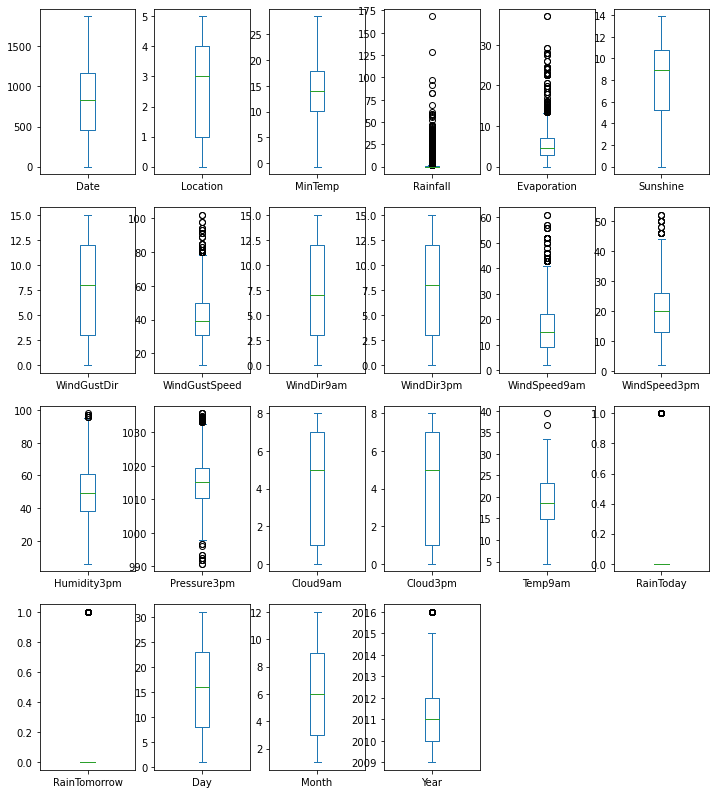

In [67]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [69]:
np.where(z>3)

(array([  26,   39,   41,   67,   88,  252,  253,  311,  312,  402,  403,
         456,  457,  458,  517,  518,  536,  548,  557,  564,  564,  567,
         571,  574,  578,  582,  583,  586,  587,  589,  592,  596,  599,
         603,  606,  610,  613,  617,  620,  624,  631,  647,  654,  654,
         657,  661,  664,  668,  672,  673,  676,  677,  679,  682,  686,
         689,  693,  696,  700,  703,  707,  710,  714,  721,  734,  769,
         771,  821,  840,  851,  858,  873,  874,  875,  879,  931,  971,
         976,  991, 1007, 1025, 1025, 1029, 1041, 1041, 1042, 1046, 1064,
        1068, 1071, 1096, 1108, 1112, 1124, 1135, 1149, 1224, 1227, 1237,
        1238, 1238, 1239, 1239, 1247, 1264, 1265, 1273, 1286, 1288, 1289,
        1289, 1297, 1332, 1334, 1384, 1403, 1414, 1421, 1436, 1437, 1438,
        1442, 1494, 1534, 1539, 1554, 1570, 1588, 1588, 1592, 1604, 1604,
        1605, 1609, 1627, 1631, 1634, 1659, 1671, 1675, 1687, 1698, 1712,
        1787, 1790, 1800, 1801, 1801, 

In [70]:
dfnew=dfn[(z<3).all(axis=1)]

In [71]:
dfnew.shape

(3602, 22)

In [72]:
dfn.shape

(3790, 22)

# checking skewness

In [73]:
dfnew.skew().sort_values()

Sunshine        -0.631088
Location        -0.513148
Cloud3pm        -0.123610
Cloud9am        -0.096728
WindDir3pm      -0.065738
Day             -0.009626
WindGustDir      0.001259
WindDir9am       0.018928
Temp9am          0.024481
Month            0.031270
MinTemp          0.058755
Pressure3pm      0.150010
Humidity3pm      0.169894
WindSpeed3pm     0.265848
Date             0.318338
WindGustSpeed    0.511408
WindSpeed9am     0.651235
Evaporation      0.756894
Year             0.814285
RainToday        1.351322
RainTomorrow     1.361116
Rainfall         3.277917
dtype: float64

In [74]:
list=['Rainfall','RainToday']

In [75]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [76]:
dfnew.skew().sort_values()

Sunshine        -0.631088
Location        -0.513148
Cloud3pm        -0.123610
Cloud9am        -0.096728
WindDir3pm      -0.065738
Day             -0.009626
WindGustDir      0.001259
WindDir9am       0.018928
Temp9am          0.024481
Month            0.031270
MinTemp          0.058755
Pressure3pm      0.150010
Humidity3pm      0.169894
WindSpeed3pm     0.265848
Date             0.318338
WindGustSpeed    0.511408
WindSpeed9am     0.651235
Evaporation      0.756894
Year             0.814285
RainToday        1.351322
RainTomorrow     1.361116
Rainfall         1.826766
dtype: float64

# standard scaler

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [78]:
x=dfnew.drop(["RainTomorrow"],axis=1)
y=dfnew["RainTomorrow"]

In [79]:
dfx=sc.fit_transform(x)

In [80]:
dfx.mean()

6.29739893251859e-16

# application of machine learning models

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [82]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# KNeighbors Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.8288621646623496
at random state 0, confusion matrix is [[781  61]
 [124 115]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.93      0.89       842
           1       0.65      0.48      0.55       239

    accuracy                           0.83      1081
   macro avg       0.76      0.70      0.72      1081
weighted avg       0.82      0.83      0.82      1081



at random state 1,  accuracy score is 0.8334875115633672
at random state 1, confusion matrix is [[789  53]
 [127 112]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90       842
           1       0.68      0.47      0.55       239

    accuracy                           0.83      1081
   macro avg       0.77      0.70      0.73      1081
weighted avg       0.82      0.83      0.82      1081



at random state 

In [84]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.73370319 0.80721221 0.70138889 0.8        0.83611111]
0.7756830790568655
0.05003775230498257


# LogisticRegression

In [85]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.8630897317298798
at random state 0, confusion matrix is [[801  41]
 [107 132]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.88      0.95      0.92       842
           1       0.76      0.55      0.64       239

    accuracy                           0.86      1081
   macro avg       0.82      0.75      0.78      1081
weighted avg       0.86      0.86      0.85      1081



at random state 1,  accuracy score is 0.8501387604070305
at random state 1, confusion matrix is [[793  49]
 [113 126]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.88      0.94      0.91       842
           1       0.72      0.53      0.61       239

    accuracy                           0.85      1081
   macro avg       0.80      0.73      0.76      1081
weighted avg       0.84      0.85      0.84      1081



at random state 

# CROSSVALIDATION:

In [86]:
score=cross_val_score(lg,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.76206323 0.82695507 0.85666667 0.85333333 0.87833333 0.85833333]
0.8392808282492142
0.037643765246544586


# DecisionTreeClassifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.8408880666049954
at random state 0, confusion matrix is [[751  91]
 [ 81 158]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.90       842
           1       0.63      0.66      0.65       239

    accuracy                           0.84      1081
   macro avg       0.77      0.78      0.77      1081
weighted avg       0.84      0.84      0.84      1081



at random state 1,  accuracy score is 0.849213691026827
at random state 1, confusion matrix is [[757  85]
 [ 78 161]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.91      0.90      0.90       842
           1       0.65      0.67      0.66       239

    accuracy                           0.85      1081
   macro avg       0.78      0.79      0.78      1081
weighted avg       0.85      0.85      0.85      1081



at random state 2

<b>CV score<b>

In [88]:
score=cross_val_score(dtc,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.65087282 0.72817955 1.         1.         0.745      0.6375
 0.775      0.7775     0.8275    ]
0.7935058187863673
0.12397861544769148


# RandomForestClassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.8926919518963923
at random state 0, confusion matrix is [[811  31]
 [ 85 154]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.91      0.96      0.93       842
           1       0.83      0.64      0.73       239

    accuracy                           0.89      1081
   macro avg       0.87      0.80      0.83      1081
weighted avg       0.89      0.89      0.89      1081



at random state 1,  accuracy score is 0.8973172987974098
at random state 1, confusion matrix is [[816  26]
 [ 85 154]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.91      0.97      0.94       842
           1       0.86      0.64      0.74       239

    accuracy                           0.90      1081
   macro avg       0.88      0.81      0.84      1081
weighted avg       0.89      0.90      0.89      1081



at random state 

<b>CV score<b>

In [90]:
score=cross_val_score(rf,dfx,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.82181515 0.88259784 0.84916667]
0.8511932186141179
0.024855767472829166


# Hyper parameter tuning using Grid Search CV

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[17,19,20],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}

In [93]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=3)

In [94]:
gd.fit(dfx,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [17, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [95]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'max_features': 'log2',
 'n_estimators': 200}

In [96]:
gd.best_score_

0.8689550374687759

# final model

In [97]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=47,test_size=0.30)
rf=RandomForestClassifier(max_features='auto',max_depth=17,criterion="entropy",n_estimators=100)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")

Accuracy score:-- 0.8973172987974098
Confusion matrix:-- [[820  31]
 [ 80 150]]
classification report:--               precision    recall  f1-score   support

           0       0.91      0.96      0.94       851
           1       0.83      0.65      0.73       230

    accuracy                           0.90      1081
   macro avg       0.87      0.81      0.83      1081
weighted avg       0.89      0.90      0.89      1081





# AUC ROC

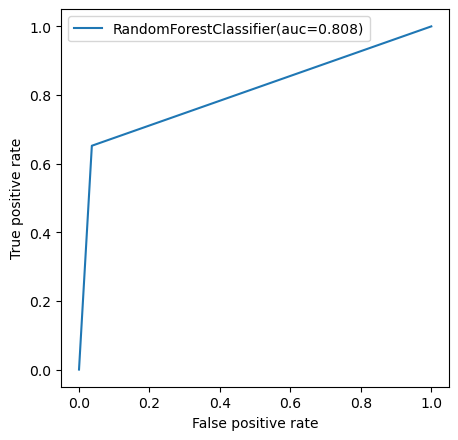

In [98]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

# prediction

In [99]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [100]:
dfpred.sample(40)

,Expected,Predicted
6336,0,0
1240,1,1
1234,1,0
5587,1,1
8127,0,0
7796,0,0
1086,0,0
7205,1,1
8121,0,0
7830,0,0


# model saving

In [101]:
import pickle
filename="rain_tomorrow.obj"
pickle.dump(rf,open(filename,'wb'))

# prediction of amount of rainfall

# check of outliers

Date                 AxesSubplot(0.125,0.71587;0.110714x0.16413)
Location          AxesSubplot(0.257857,0.71587;0.110714x0.16413)
MinTemp           AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Rainfall          AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Evaporation       AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Sunshine          AxesSubplot(0.789286,0.71587;0.110714x0.16413)
WindGustDir         AxesSubplot(0.125,0.518913;0.110714x0.16413)
WindGustSpeed    AxesSubplot(0.257857,0.518913;0.110714x0.16413)
WindDir9am       AxesSubplot(0.390714,0.518913;0.110714x0.16413)
WindDir3pm       AxesSubplot(0.523571,0.518913;0.110714x0.16413)
WindSpeed9am     AxesSubplot(0.656429,0.518913;0.110714x0.16413)
WindSpeed3pm     AxesSubplot(0.789286,0.518913;0.110714x0.16413)
Humidity3pm         AxesSubplot(0.125,0.321957;0.110714x0.16413)
Pressure3pm      AxesSubplot(0.257857,0.321957;0.110714x0.16413)
Cloud9am         AxesSubplot(0.390714,0.321957;0.110714x0.16413)
Cloud3pm         AxesSubp

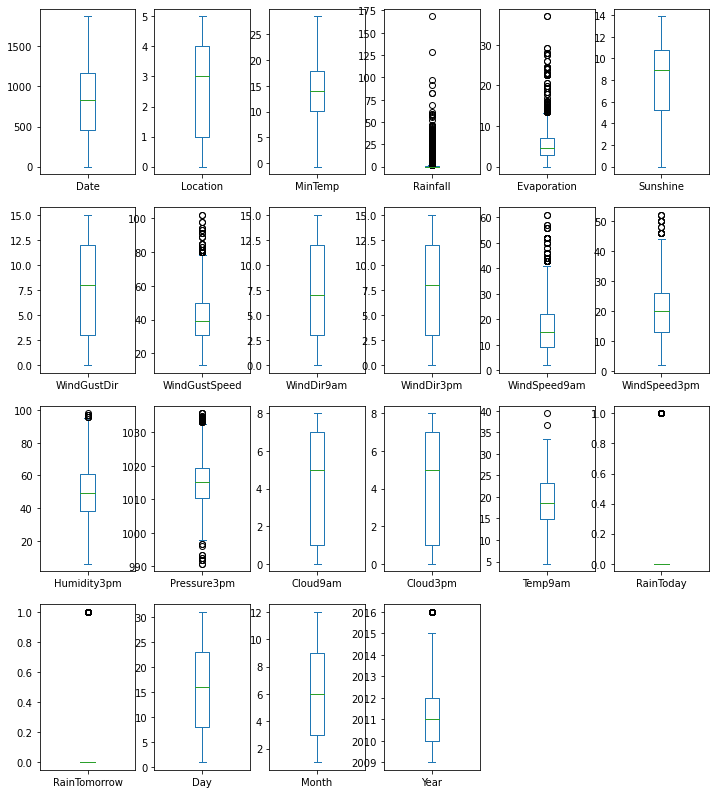

In [102]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [104]:
dfn.shape

(3790, 22)

In [105]:
np.where(z>3)

(array([  26,   39,   41,   67,   88,  252,  253,  311,  312,  402,  403,
         456,  457,  458,  517,  518,  536,  548,  557,  564,  564,  567,
         571,  574,  578,  582,  583,  586,  587,  589,  592,  596,  599,
         603,  606,  610,  613,  617,  620,  624,  631,  647,  654,  654,
         657,  661,  664,  668,  672,  673,  676,  677,  679,  682,  686,
         689,  693,  696,  700,  703,  707,  710,  714,  721,  734,  769,
         771,  821,  840,  851,  858,  873,  874,  875,  879,  931,  971,
         976,  991, 1007, 1025, 1025, 1029, 1041, 1041, 1042, 1046, 1064,
        1068, 1071, 1096, 1108, 1112, 1124, 1135, 1149, 1224, 1227, 1237,
        1238, 1238, 1239, 1239, 1247, 1264, 1265, 1273, 1286, 1288, 1289,
        1289, 1297, 1332, 1334, 1384, 1403, 1414, 1421, 1436, 1437, 1438,
        1442, 1494, 1534, 1539, 1554, 1570, 1588, 1588, 1592, 1604, 1604,
        1605, 1609, 1627, 1631, 1634, 1659, 1671, 1675, 1687, 1698, 1712,
        1787, 1790, 1800, 1801, 1801, 

In [106]:
dfnew=dfn[(z<3).all(axis=1)]

In [107]:
dfnew.shape

(3602, 22)

# checking the skewness of the data

In [108]:
dfnew.skew().sort_values()

Sunshine        -0.631088
Location        -0.513148
Cloud3pm        -0.123610
Cloud9am        -0.096728
WindDir3pm      -0.065738
Day             -0.009626
WindGustDir      0.001259
WindDir9am       0.018928
Temp9am          0.024481
Month            0.031270
MinTemp          0.058755
Pressure3pm      0.150010
Humidity3pm      0.169894
WindSpeed3pm     0.265848
Date             0.318338
WindGustSpeed    0.511408
WindSpeed9am     0.651235
Evaporation      0.756894
Year             0.814285
RainToday        1.351322
RainTomorrow     1.361116
Rainfall         3.277917
dtype: float64

In [109]:
x=dfnew.drop(["Rainfall"],axis=1)
y=dfnew["Rainfall"]

In [110]:
list=['RainTomorrow','RainToday']

In [111]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [112]:
dfnew.skew().sort_values()

Sunshine        -0.631088
Location        -0.513148
Cloud3pm        -0.123610
Cloud9am        -0.096728
WindDir3pm      -0.065738
Day             -0.009626
WindGustDir      0.001259
WindDir9am       0.018928
Temp9am          0.024481
Month            0.031270
MinTemp          0.058755
Pressure3pm      0.150010
Humidity3pm      0.169894
WindSpeed3pm     0.265848
Date             0.318338
WindGustSpeed    0.511408
WindSpeed9am     0.651235
Evaporation      0.756894
Year             0.814285
RainToday        1.351322
RainTomorrow     1.361116
Rainfall         3.277917
dtype: float64

# scaling of data

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [114]:
dfx=sc.fit_transform(x)

In [115]:
dfx.mean()

6.267339749069814e-16

# application of machine learning models

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [117]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

# KNeighbors Regressor model

In [118]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.4724553268463506
at random state 0, mean squared error is 8.702820351526366
at random state 0, mean absolute error is 1.1171507863089731


at random state 1, testing accuracy is 0.5098886073888675
at random state 1, mean squared error is 7.762824051803884
at random state 1, mean absolute error is 1.0512488436632748


at random state 2, testing accuracy is 0.3955855759561562
at random state 2, mean squared error is 10.837531174838114
at random state 2, mean absolute error is 1.2916558741905642


at random state 3, testing accuracy is 0.47965329784062527
at random state 3, mean squared error is 8.506597594819612
at random state 3, mean absolute error is 1.1038667900092507


at random state 4, testing accuracy is 0.46136049968747805
at random state 4, mean squared error is 7.900398889916744
at random state 4, mean absolute error is 1.0172432932469935


at random state 5, testing accuracy is 0.44191287113282895
at random state 5, mean squared error 

<b>cv score<b>

In [119]:
score=cross_val_score(knr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.46920611 0.43259121 0.57745105 0.64284536 0.4011178  0.55022118
 0.4947854  0.49460998 0.44638489]
0.5010236641124654
0.07235477227485501


# Linear regression

In [120]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, testing accuracy is 0.5308231398638589
at random state 0, mean squared error is 7.739935847421233
at random state 0, mean absolute error is 1.2823334841683658


at random state 1, testing accuracy is 0.5184931246318845
at random state 1, mean squared error is 7.626537986196651
at random state 1, mean absolute error is 1.2762181052612847


at random state 2, testing accuracy is 0.531272335168633
at random state 2, mean squared error is 8.404582150988709
at random state 2, mean absolute error is 1.323362775516898


at random state 3, testing accuracy is 0.520734648886046
at random state 3, mean squared error is 7.835002059487707
at random state 3, mean absolute error is 1.313039335081074


at random state 4, testing accuracy is 0.5092199795033003
at random state 4, mean squared error is 7.19842849786504
at random state 4, mean absolute error is 1.2401995100361507


at random state 5, testing accuracy is 0.5313045814445123
at random state 5, mean squared error is 7.0777

<b> cv score<b>

In [121]:
score=cross_val_score(lm,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.52198205 0.40504078 0.56078375 0.54129317]
0.5072749368398081
0.06059817277824438


# random forest regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.6245259939784676
at random state 0, mean squared error is 6.19413480481036
at random state 0, mean absolute error is 0.9548214616096206


at random state 1, testing accuracy is 0.6306301254748832
at random state 1, mean squared error is 5.85041153746531
at random state 1, mean absolute error is 0.9292247918593894


at random state 2, testing accuracy is 0.5898604484134844
at random state 2, mean squared error is 7.354060392229417
at random state 2, mean absolute error is 0.9931526364477336


at random state 3, testing accuracy is 0.570003106577917
at random state 3, mean squared error is 7.0295641813135985
at random state 3, mean absolute error is 0.9993339500462535


at random state 4, testing accuracy is 0.5997341400006655
at random state 4, mean squared error is 5.870828177613322
at random state 4, mean absolute error is 0.8786734505087882


at random state 5, testing accuracy is 0.6308194080070297
at random state 5, mean squared error is 5.5

<b>cv score<b>

In [123]:
score=cross_val_score(rfr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.51105207 0.66379909 0.92198661 0.93500722 0.55565702 0.63453703
 0.54515208 0.56511428 0.4704542 ]
0.6447510673701018
0.16125544929196975


# building final model

In [124]:
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=44,test_size=0.30)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {44} testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {44} mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {44}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 44 testing accuracy is 0.6319522052927754
at random state 44 mean squared error is 6.138888240518038
at random state 44, mean absolute error is 0.947731729879741


# visualisation

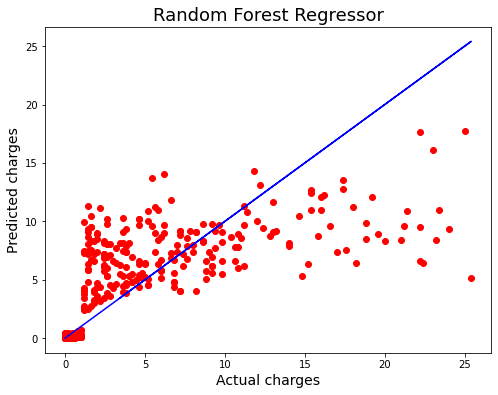

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()


# saving the model

In [126]:
import pickle
filename = 'rainfall.obj'
pickle.dump(knr,open(filename, 'wb'))